<a href="https://colab.research.google.com/github/LomanovAY/colab/blob/main/Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque

In [2]:
class Graph:
  def __init__(self):
    self.nodes=nx.Graph()

  def add_node(self, node):
    self.nodes.add_node(node)

  def add_edge(self, node1, node2):
    self.nodes.add_edge(node1, node2)

  def get_neigbors(self, node):
    return list(self.nodes.neighbors(node))

  def get_all_nodes(self):
    return list(self.nodes.nodes())

  def visualize(self):
    nx.draw_networkx(self.nodes,
                     with_labels=True,
                     node_size=400,
                     node_color='lightblue',
                     edge_color='grey',
                     font_size='10',
                     font_weight='bold')
    plt.axis('auto')
    plt.show()

# поиск в ширину
  def bfs(self, start, end):
      visited = {start}
      queue = deque([(start, [start])])

      while queue:
        node, path = queue.popleft()

        if node == end:
          print(f"BFS Path: {' -> '.join(map(str,path))}")
          return path

        for neighbor in self.nodes.neighbors(node):
          if neighbor not in visited:
            visited.add(neighbor)
            new_path = list(path)
            new_path.append(neighbor)
            queue.append((neighbor, new_path))
      print("BFS: Path not found")
      return None

# поиск в глубину
  def dfs(self, start, end):
      visited = set()
      path = []

      if self._dfs_util(start, end, visited, path):
        print(f"DFS Path: {' -> '.join(map(str, path))}")
        return path
      else:
        print("DFS: Path not found")
        return None

  def _dfs_util(self, node, end, visited, path):
      visited.add(node)
      path.append(node)

      if node == end:
        return True

      for neighbor in self.nodes.neighbors(node):
        if neighbor not in visited:
          if self._dfs_util(neighbor, end, visited, path):
            return True

      path.pop()
      return False

In [3]:
graph = Graph()
nodes_to_add = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
for node in nodes_to_add:
  graph.add_node(node)

edges_to_add = [
    (1, 3), (2, 3), (2, 4), (2, 6), (3, 4), (4, 5), (5, 6),
    (5, 7), (6, 7), (7, 8), (7, 9), (8, 10), (9, 10), (9, 13),
    (10, 14), (11, 2), (11, 15), (12, 11), (12, 13), (13, 14),
    (15, 16), (15, 18), (17, 15), (15, 17), (12, 17), (16, 18)
]
for u, v in edges_to_add:
  graph.add_edge(u, v)

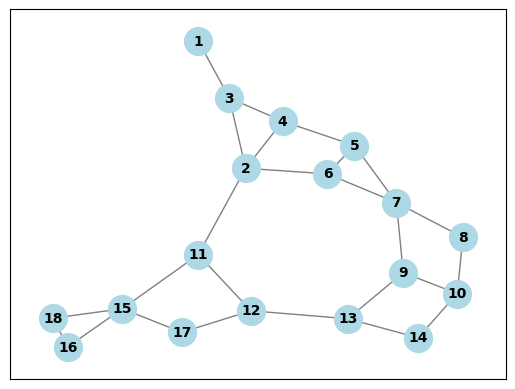

In [4]:
graph.visualize()

In [5]:
start_node = 1
end_node = 18

print(f"Поиск пути из {start_node} в {end_node}:")

dfs_path = graph.dfs(start_node, end_node)
bfs_path = graph.bfs(start_node, end_node)

Поиск пути из 1 в 18:
DFS Path: 1 -> 3 -> 2 -> 4 -> 5 -> 6 -> 7 -> 8 -> 10 -> 9 -> 13 -> 12 -> 11 -> 15 -> 16 -> 18
BFS Path: 1 -> 3 -> 2 -> 11 -> 15 -> 18


In [6]:
print("\n--- Сценарий А: Поиск 5 -> 17 ---")
graph.dfs(5, 17)
graph.bfs(5, 17)

print("\n--- Сценарий B: Путь 2 -> 19 не существует ---")
graph.add_node(19)
graph.dfs(2, 19)
graph.bfs(2, 19)


--- Сценарий А: Поиск 5 -> 17 ---
DFS Path: 5 -> 4 -> 2 -> 6 -> 7 -> 8 -> 10 -> 9 -> 13 -> 12 -> 11 -> 15 -> 17
BFS Path: 5 -> 4 -> 2 -> 11 -> 15 -> 17

--- Сценарий B: Путь 2 -> 19 не существует ---
DFS: Path not found
BFS: Path not found
